# Read File

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #Exploratary Plot
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\merged.csv')
df.drop(['Unnamed: 0'],axis=1)


,videoID,title,publishedAt,channelId,channelTitle,categoryId,tags,views,likes,comments,...,dayOfWeek,daytime,duration,titleLength,questionMark,exclamationMark,sentimentScore,fullCapSentence,fullCapCount,trendingOrNot
0,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,how to make a curried egg sandwich|curried egg...,1238677.0,104736.0,13876.0,...,4,1,489.0,34,False,False,0.0000,False,6,1
1,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,cake rescue|caek fail|viral cake fails|funny c...,938198.0,44088.0,2409.0,...,4,2,690.0,75,False,False,0.1280,False,12,1
2,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,[None],1722152.0,169501.0,7263.0,...,3,1,43.0,34,False,False,0.0000,False,1,1
3,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,president|trump|donald|executive|orders|stimul...,1090847.0,10922.0,9876.0,...,6,3,199.0,61,False,False,0.0000,False,1,1
4,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,warner bros|warner brothers|wb|fred hampton|wi...,971704.0,23311.0,3240.0,...,3,3,108.0,46,False,False,0.0000,False,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121197,BV5uMEAyO80,"Let Her Go, Infinity ~ Sad songs for you to ma...",2022-08-13 01:20:23+00:00,UCddacnLI6urbcLGcHQNH0fg,Sunset Mood,10,"['Sunset Mood', 'sad songs', 'sad songs playli...",188446.0,2692.0,18.0,...,5,3,3825.0,92,False,False,-0.4215,False,6,0
121198,wWQe_1-3yfA,Save Your Tears | Sad songs for broken hearts ...,2022-08-12 01:06:52+00:00,UCddacnLI6urbcLGcHQNH0fg,Sunset Mood,10,"['Sunset Mood', 'save your tears', 'save your ...",39649.0,1010.0,8.0,...,4,3,3853.0,96,False,False,-0.8625,False,5,0
121199,VWe8RskA_TM,"Mood,Unstoppable 😢 Depressing Songs 2022 💔 Sad...",2022-08-11 00:30:05+00:00,UCddacnLI6urbcLGcHQNH0fg,Sunset Mood,10,"['Sunset Mood', 'sad songs', 'sad songs playli...",50943.0,1256.0,6.0,...,3,3,3815.0,89,False,False,-0.8316,False,12,0
121200,NpTprIRDoPc,Unstoppable 😢 Sad Song Playlist 2022 💔 Depress...,2022-08-10 01:31:33+00:00,UCddacnLI6urbcLGcHQNH0fg,Sunset Mood,10,"['Sunset Mood', 'unstoppable', 'unstoppable co...",170835.0,3341.0,21.0,...,2,3,3732.0,92,False,False,-0.8625,False,12,0


In [3]:
print(df.publishedAt.min())
print(df.publishedAt.max())

2018-01-01 06:12:47+00:00
2023-05-02 12:00:25+00:00


In [4]:
df.duration.max()

485620.0

In [5]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])


In [6]:
df['categoryId'].value_counts()

24    27865
20    26573
17    11838
22     8937
28     8165
10     7356
27     6446
26     6212
15     4525
19     2840
25     2783
2      2715
1      2666
23     1769
29      512
Name: categoryId, dtype: int64

In [7]:
df['categoryId'].nunique()

15

Text(0, 0.5, 'Video Counts')

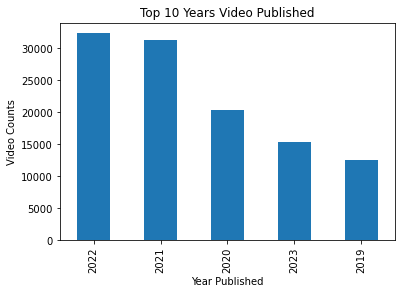

In [7]:
ax = df['publishedAt'].dt.strftime("%Y")\
.value_counts().head()\
.plot(kind='bar',title='Top 10 Years Video Published')
ax.set_xlabel('Year Published')
ax.set_ylabel('Video Counts')

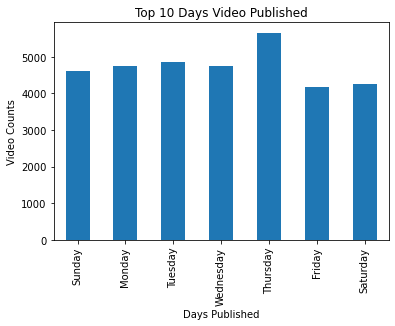

In [68]:
# Top 10 days video published for all video

# Use the map() method of the pandas Series object to convert the numerical variable to the day name
day_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

dayofWeeks = df.loc[df['trendingOrNot'] == 1, 'dayOfWeek']
# Create the bar chart with the day labels
ax = df['dayOfWeek'].value_counts().sort_index().plot(kind='bar', title='Top 10 Days Video Published')

# Set the x-axis tick labels to the day names
ax.set_xticklabels(day_dict.values())

# Set the x and y axis labels
ax.set_xlabel('Days Published')
ax.set_ylabel('Video Counts')

# Show the chart
plt.show()

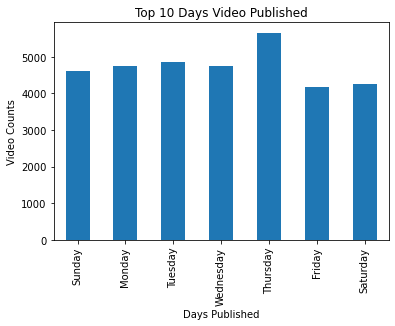

In [71]:
# Top 10 days video published for all trending Video
# Use the map() method of the pandas Series object to convert the numerical variable to the day name
day_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

dayofWeeks = df.loc[df['trendingOrNot'] == 1, 'dayOfWeek']
# Create the bar chart with the day labels
ax = dayofWeeks.value_counts().sort_index().plot(kind='bar', title='Top 10 Days Video Published')

# Set the x-axis tick labels to the day names
ax.set_xticklabels(day_dict.values())

# Set the x and y axis labels
ax.set_xlabel('Days Published')
ax.set_ylabel('Video Counts')

# Show the chart
plt.show()

Text(0, 0.5, 'Video Counts')

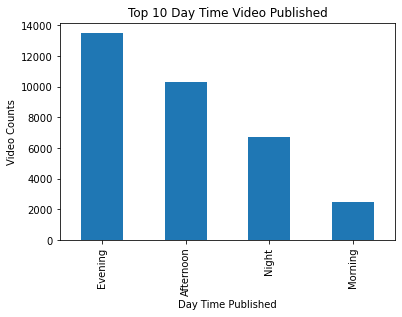

In [67]:
daytimes = df.loc[df['trendingOrNot'] == 1, 'daytime']

ax = daytimes.value_counts().head()\
.plot(kind='bar',title='Top 10 Day Time Video Published')
ax.set_xlabel('Day Time Published')
ax.set_ylabel('Video Counts')

<AxesSubplot:xlabel='views', ylabel='likes'>

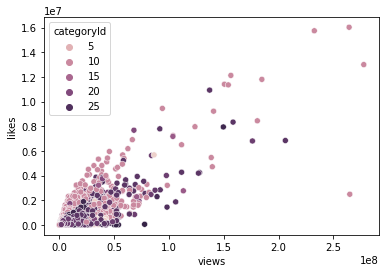

In [31]:
sns.scatterplot(x='views',y='likes',hue='categoryId',data=df)

<AxesSubplot:xlabel='views', ylabel='duration'>

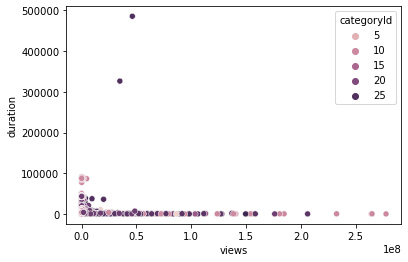

In [12]:
sns.scatterplot(x='views',y='duration',hue='categoryId',data=df)

Text(0, 0.5, 'Video Counts')

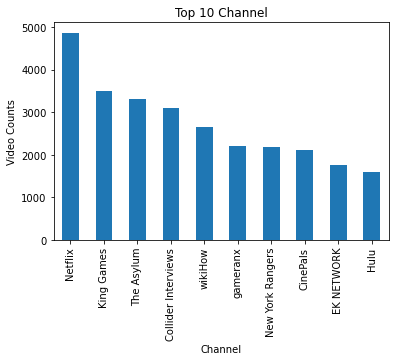

In [32]:
ax = df['channelTitle']\
.value_counts().head(10)\
.plot(kind='bar',title='Top 10 Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Video Counts')

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LEGION\anaconda3\lib\site-packages

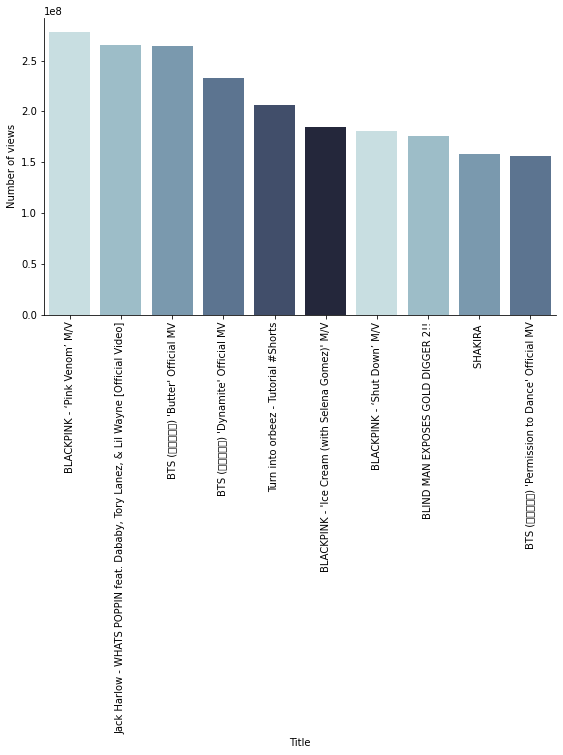

In [33]:
top10viewed = df[df['views'] == df['views']].sort_values(by=['views'],ascending=False).head(10)
top10viewed.title=top10viewed.title.str.split(pat='|').apply(lambda x: x[0])
sns.catplot(data=top10viewed, x='title', y='views',kind='bar',palette = sns.cubehelix_palette(rot=-.2) ,ci=None, legend_out=False,aspect =2)

plt.ylabel('Number of views')
plt.xlabel('Title')
plt.xticks(rotation=90)
plt.show()

In [8]:
# Get Category Name For Each Category ID 
import json
with open(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\US_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [9]:
pd.options.display.max_rows = 13000
df_category =pd.DataFrame(category,columns=['categoryId','category']) 
df_category.categoryId=df_category.categoryId.astype('int64')
df_merge = df.merge(df_category, on = 'categoryId', how = 'inner')
df_merge['category']


0                 Howto & Style
1                 Howto & Style
2                 Howto & Style
3                 Howto & Style
4                 Howto & Style
                  ...          
121197    Nonprofits & Activism
121198    Nonprofits & Activism
121199    Nonprofits & Activism
121200    Nonprofits & Activism
121201    Nonprofits & Activism
Name: category, Length: 121202, dtype: object

<AxesSubplot:xlabel='category'>

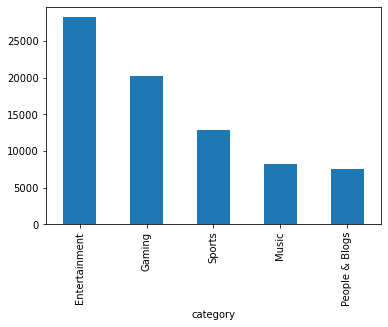

In [37]:
#Most Common Category ID
df_merge.groupby(df_merge['category']).size().sort_values(ascending=False).head(5).plot(kind='bar')

Text(0, 0.5, 'Video Counts')

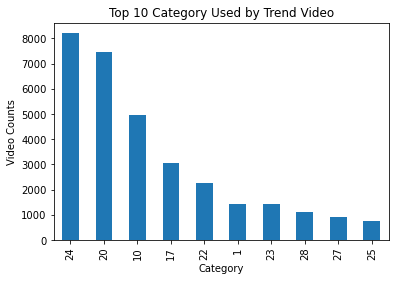

In [74]:
#Most trends video category
category = df.loc[df['trendingOrNot'] == 1, 'categoryId']

ax = category.value_counts().head(10)\
.plot(kind='bar',title='Top 10 Category Used by Trend Video')
ax.set_xlabel('Category')
ax.set_ylabel('Video Counts')

Text(0, 0.5, 'Category ID')

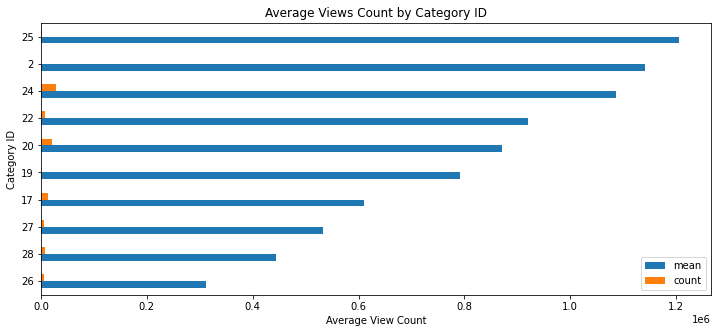

In [60]:
ax = df.query('categoryId != "0"').groupby('categoryId')['views']\
.agg(['mean','count']).sort_values('mean').head(10)\
.plot(kind='barh',figsize=(12,5),title='Average Views Count by Category ID')
ax.set_xlabel('Average View Count')
ax.set_ylabel('Category ID')

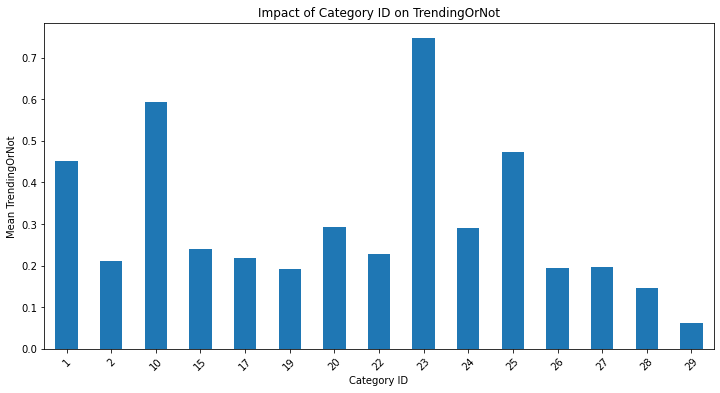

In [10]:
# Calculate the mean of 'trendingOrNot' for each category
category_means = df.groupby('categoryId')['trendingOrNot'].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
category_means.plot(kind='bar')
plt.xlabel('Category ID')
plt.ylabel('Mean TrendingOrNot')
plt.title('Impact of Category ID on TrendingOrNot')
plt.xticks(rotation=45)
plt.show()

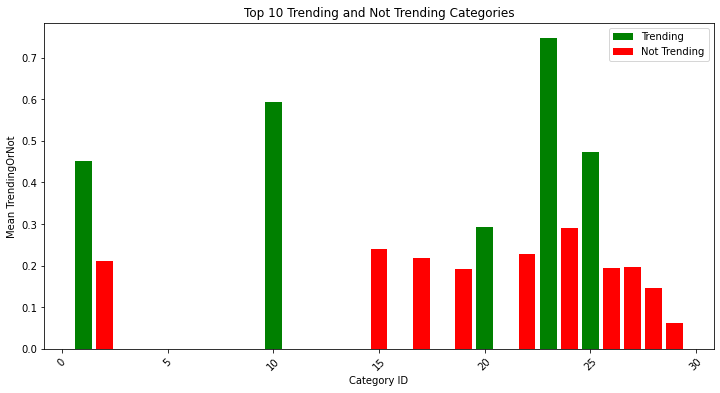

In [11]:
# Calculate the mean of 'trendingOrNot' for each category
category_means = df.groupby('categoryId')['trendingOrNot'].mean()

# Sort the categories based on the mean value
sorted_categories = category_means.sort_values(ascending=False)

# Separate the top 10 trending and non-trending categories
top_10_trending = sorted_categories.head(10)
top_10_not_trending = sorted_categories.tail(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_trending.index, top_10_trending, label='Trending', color='green')
plt.bar(top_10_not_trending.index, top_10_not_trending, label='Not Trending', color='red')
plt.xlabel('Category ID')
plt.ylabel('Mean TrendingOrNot')
plt.title('Top 10 Trending and Not Trending Categories')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [43]:
from IPython.display import HTML, display
most_views_thumb = df['thumbnailLink'].head(100).reset_index()['thumbnailLink']

ROW = 10
COLUMN = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(ROW):
    rowHTML = ''
    for c in range(COLUMN):
        tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
    innerHTML += rowHTML #'<div>' +rowHTML + '</div>'
innerHTML += '</div>'
display(HTML(innerHTML))

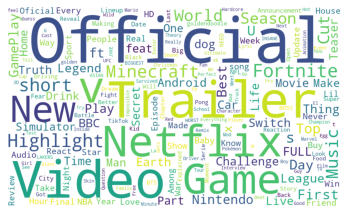

In [14]:
#WordCloud (For Trend)

from wordcloud import WordCloud,STOPWORDS

titles = df.loc[df['trendingOrNot'] == 1, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)\
                     .generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

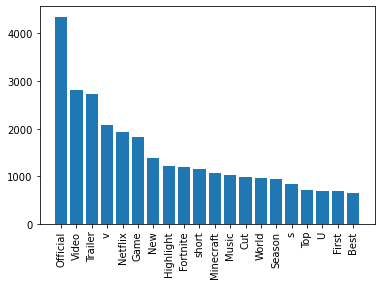

In [15]:
from wordcloud import WordCloud, STOPWORDS
titles = df.loc[df['trendingOrNot'] == 1, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)
wordcloud.generate(text)

word_freq = wordcloud.process_text(text)
sorted_word_freq = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}
top_10_words = dict(list(sorted_word_freq.items())[:20])

plt.bar(top_10_words.keys(), top_10_words.values())
plt.xticks(rotation=90)
plt.show()

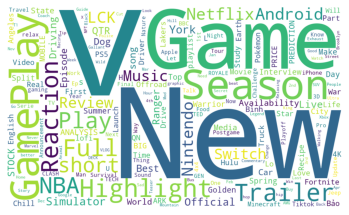

In [16]:
#WordCloud (For Non Trend)

from wordcloud import WordCloud,STOPWORDS

titles = df.loc[df['trendingOrNot'] == 0, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)\
                     .generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

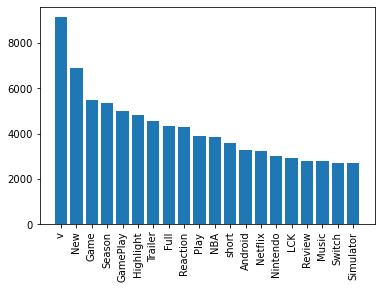

In [17]:
from wordcloud import WordCloud, STOPWORDS
titles = df.loc[df['trendingOrNot'] == 0, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)
wordcloud.generate(text)

word_freq = wordcloud.process_text(text)
sorted_word_freq = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}
top_10_words = dict(list(sorted_word_freq.items())[:20])

plt.bar(top_10_words.keys(), top_10_words.values())
plt.xticks(rotation=90)
plt.show()

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


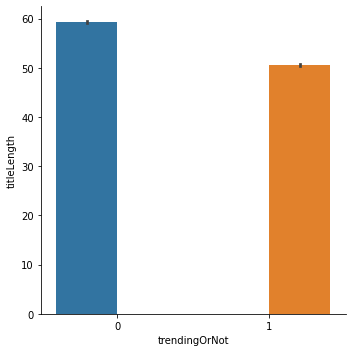

In [18]:
sns.factorplot(x ='trendingOrNot', y ='titleLength', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Count')

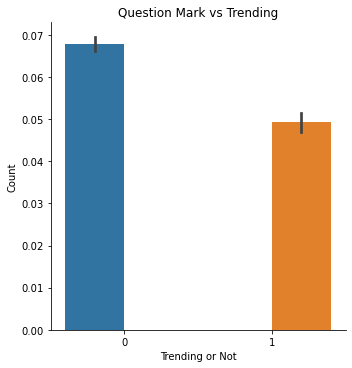

In [14]:
sns.factorplot(x ='trendingOrNot', y ='questionMark', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)
plt.title('Question Mark vs Trending')
plt.xlabel('Trending or Not')
plt.ylabel('Count')

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.950000000000003, 0.5, 'Count')

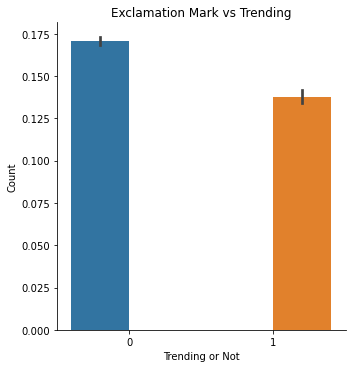

In [15]:
sns.factorplot(x ='trendingOrNot', y ='exclamationMark', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)
plt.title('Exclamation Mark vs Trending')
plt.xlabel('Trending or Not')
plt.ylabel('Count')

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.950000000000003, 0.5, 'Count')

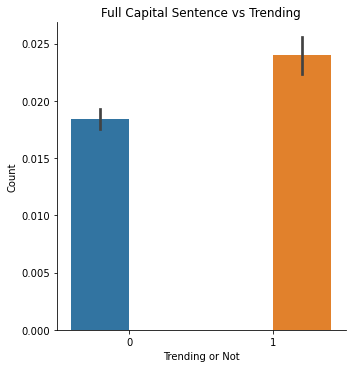

In [16]:
sns.factorplot(x ='trendingOrNot', y ='fullCapSentence', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)
plt.title('Full Capital Sentence vs Trending')
plt.xlabel('Trending or Not')
plt.ylabel('Count')

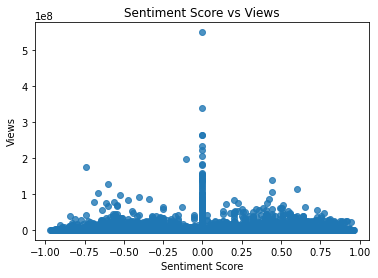

In [9]:
sns.regplot(x='sentimentScore', y='views', data=df)
plt.title('Sentiment Score vs Views')
plt.xlabel('Sentiment Score')
plt.ylabel('Views')
plt.show()

In [19]:
cols = ['views','comments','likes','duration', 'titleLength','descriptionLength' ,'sentimentScore', 'fullCapCount']
corr_matrix = df[cols].corr()

corr_matrix

,views,comments,likes,duration,titleLength,sentimentScore,fullCapCount
views,1.000000,0.461465,0.792969,-0.022693,-0.068815,-0.009177,-0.024380
comments,0.461465,1.000000,0.654134,-0.011392,-0.037293,-0.004847,-0.008356
likes,0.792969,0.654134,1.000000,-0.030488,-0.092323,-0.007705,-0.029161
duration,-0.022693,-0.011392,-0.030488,1.000000,0.119272,0.093867,-0.018446
titleLength,-0.068815,-0.037293,-0.092323,0.119272,1.000000,0.043194,0.328788
sentimentScore,-0.009177,-0.004847,-0.007705,0.093867,0.043194,1.000000,0.007752
fullCapCount,-0.024380,-0.008356,-0.029161,-0.018446,0.328788,0.007752,1.000000


<AxesSubplot:>

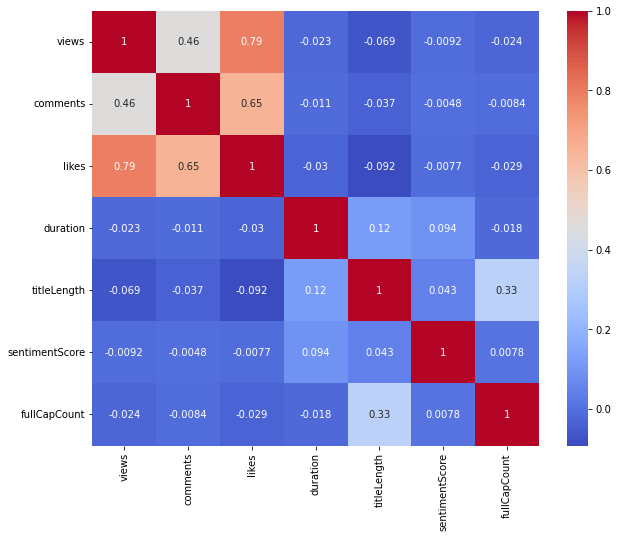

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',ax=ax)